### Import packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [3]:
df = pd.read_csv('vgsales.csv', index_col = 'Rank')
df.head()

# All sales columns are in millions 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


With this dataset, there are questions that could be answered. Here are a few questions that came to my mind right away. 
1. What do the sale trends look like for each platform? 
2. Which game franchises are the most successful?
3. Do certain regions prefer certain games/genres?

These are only the initial questions that I have come up with; I'm sure that as I explore the dataset and answer these questions, even more questions will arise. 

### Initial Exploratory Data Analysis

In [3]:
df.shape

(16598, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
df[df.isnull().values]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
...,...,...,...,...,...,...,...,...,...,...
16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01


In [4]:
df['Platform'].value_counts()
# This column is limited as certain games can be played on multiple platforms, but each game only has one platform listed.

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

I am personally surprised that the Nintendo DS has the most titles in this dataset. I would've expected PC to have the most as the PC platform does not have different generations like the PlayStation or XBox. However, this is probably due to the fact that even though most games can be played on the PC, they're not listed as a game's platform in this dataset.

In [5]:
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Pacific Century Cyber Works        1
Fuji                               1
ITT Family Games                   1
PM Studios                         1
Fields                             1
Name: Publisher, Length: 578, dtype: int64

In [6]:
publisher_vc = df['Publisher'].value_counts()
publisher_vc[publisher_vc > 5]

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Comfort                            6
Compile                            6
CDV Software Entertainment         6
Benesse                            6
Blast! Entertainment Ltd           6
Name: Publisher, Length: 212, dtype: int64

In [7]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

### Sales Trends Over Time?

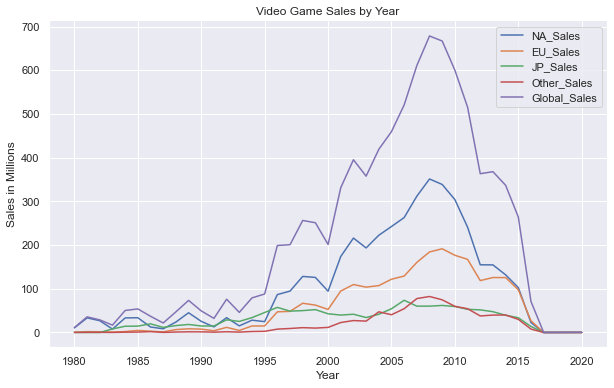

In [8]:
sales_by_year = df.groupby('Year').sum()
years = sales_by_year.index
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

sns.set()
plt.figure(figsize = (10,6))
for column in sales_cols:
    sns.lineplot(years, sales_by_year[column], label = column)

plt.legend()
plt.title('Video Game Sales by Year')
plt.ylabel('Sales in Millions')    
sns.despine()
plt.show()

From this graph, we can see video game sales reached a worldwide peak around 2008 and have fallen relatively quickly since then. While it's hard to understand exactly why the video game sales peaked in 2008 from this data alone, a quick Google search returned that 2008 saw the introduction of many new titles and sequels that are still beloved by many fans today. Some of these titles include "Metal Gear Solid 4", "Left 4 Dead", "Burnout: Paradise", "Super Smash Bros. Brawl", and "Guitar Hero World Tour".

After 2008, there was a steep decline in video game sales. This could be attributed to the global recession that affected almost everyone in some way shape or form. However, in 2008, smartphones with app stores entered the global market driving many gamers to simply game on their phones instead of consoles or PC. This significantly impacted overall video game sales, thus explaining the decline in sales.

If this dataset contained the months these games were released in, it would be interesting to see the cyclical trends in video game sales. 

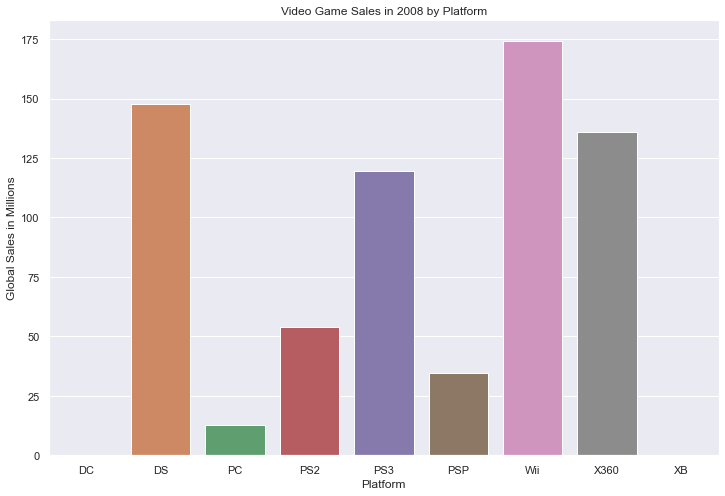

In [9]:
df_2008 = df[df['Year'] == 2008]
platform_sales_2008 = df_2008.groupby('Platform').sum()
platforms_2008 = platform_sales_2008.index

plt.figure(figsize = (12,8))
sns.barplot(x = platforms_2008, y = platform_sales_2008.Global_Sales)
plt.title('Video Game Sales in 2008 by Platform')
plt.ylabel('Global Sales in Millions')
plt.show()

During the peak of the gaming industry, the Wii dominated the industry with nearly \\$175 million in sales and the Nintendo DS coming in second at nearly \\$150 million. 2008 was a great year for Nintendo with two of their devices stealing the spotlight of the gaming industry. This brings up another question, how do the sales trends look for each company? The gaming industry can be split into 4 major companies: Nintendo, Sony, Microsoft (XBox) with PC on its own. Which years were the highs and lows for each company? 

### Sales by Company?

In [10]:
nintendo = ['DS', 'Wii', 'GBA', 'GC', '3DS', 'N64', 'SNES', 'WiiU', 'GB', 'NES']
sony = ['PS2', 'PS3', 'PSP', 'PS', 'PSV', 'PS4']
microsoft = ['X360', 'XB', 'XOne']

def company(row):
    if row['Platform'] in nintendo:
        return 'Nintendo'
    if row['Platform'] in sony:
        return 'Sony'
    if row['Platform'] in microsoft:
        return 'Microsoft'
    if row['Platform'] == 'PC':
        return 'PC'
    else:
        return 'Other'
    
df['Company'] = df.apply(company, axis = 1)
df.head()    

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Company
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo


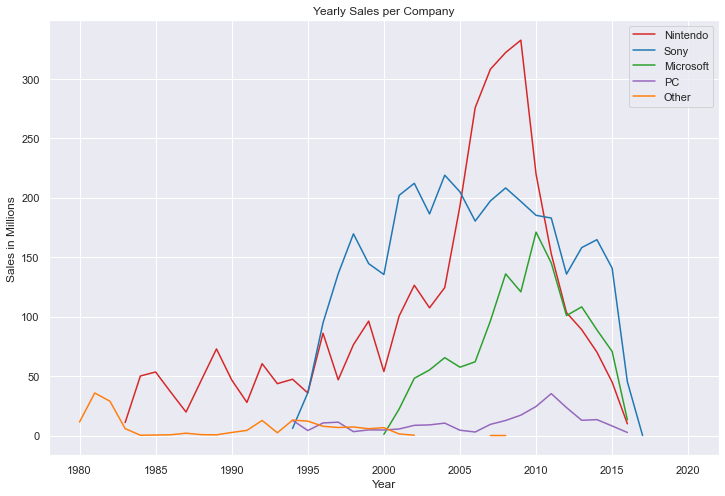

In [11]:
company_sales = df.pivot_table(index = 'Year', columns = 'Company', values = 'Global_Sales', aggfunc = 'sum')

company_colors = {'Nintendo': 'tab:red',
                  'Sony': 'tab:blue',
                  'Microsoft': 'tab:green',
                  'PC': 'tab:purple',
                  'Other': 'tab:orange'}

plt.figure(figsize = (12,8))
for company, color in company_colors.items():
    plt.plot(company_sales.index, company_sales[company], color = color, label = company)
    
plt.legend()
plt.title('Yearly Sales per Company')
plt.xlabel('Year')
plt.ylabel('Sales in Millions')
plt.show()


When comparing the sales trends for each company, it's surprising just how dominant Nintendo may have been in the mid 2000's. However, this graph may not paint an accurate picture as each game only had one platform listed, as mentioned earlier. Most games released for Nintendo devices (Super Smash Bros Brawl, Wii Sports, Pokemon series) are exclusive to Nintendo devices. However, most games played on PlayStation or XBox are usually available on multiple platforms, with only a select few titles being exclusive to each company. This would lead to an underrepresentation of sales for both Sony and Microsoft consoles (and PC) in this graph. 